# Linear Regression

In [10]:
import torch
import warnings
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=FutureWarning)

print(f'torch version is : {torch.__version__}')
print(f'numpy version is : {np.__version__}')

torch version is : 2.0.0+cpu
numpy version is : 1.23.5


## Regression Model
$$ y = \alpha x + \beta $$


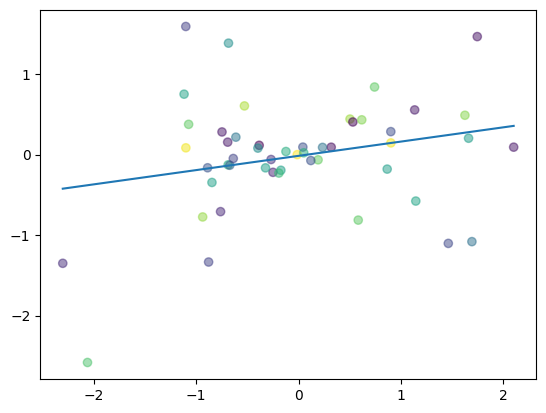

In [3]:
# Creates 50 random x and y numbers
np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

# Makes the dots colorful
colors = np.random.rand(n)

# Plots best-fit line via polyfit
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

# Plots the random x and y data points we created
# Interestingly, alpha makes it more aesthetically pleasing
plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [4]:
x_values = [i for i in range(11)]
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [5]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [6]:
y_values = [2*i + 1 for i in x_values]

In [7]:
# In case you're weak in list iterators...
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result) 

In [8]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [9]:
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

In [11]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  

    def forward(self, x):
        out = self.linear(x)
        return out

In [12]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [15]:
epochs = 100
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [16]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train).requires_grad_()
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 

    # Forward to get output
    outputs = model(inputs)

    # Calculate Loss
    loss = criterion(outputs, labels)

    # Getting gradients w.r.t. parameters
    loss.backward()

    # Updating parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 126.87606811523438
epoch 2, loss 10.533931732177734
epoch 3, loss 1.0422096252441406
epoch 4, loss 0.26595693826675415
epoch 5, loss 0.20061951875686646
epoch 6, loss 0.19329223036766052
epoch 7, loss 0.19071854650974274
epoch 8, loss 0.18855524063110352
epoch 9, loss 0.1864469200372696
epoch 10, loss 0.18436473608016968
epoch 11, loss 0.1823057234287262
epoch 12, loss 0.18026995658874512
epoch 13, loss 0.17825715243816376
epoch 14, loss 0.17626641690731049
epoch 15, loss 0.1742982119321823
epoch 16, loss 0.17235158383846283
epoch 17, loss 0.17042706906795502
epoch 18, loss 0.16852398216724396
epoch 19, loss 0.16664202511310577
epoch 20, loss 0.16478121280670166
epoch 21, loss 0.1629410684108734
epoch 22, loss 0.161121666431427
epoch 23, loss 0.15932230651378632
epoch 24, loss 0.15754330158233643
epoch 25, loss 0.15578407049179077
epoch 26, loss 0.1540442854166031
epoch 27, loss 0.15232430398464203
epoch 28, loss 0.15062321722507477
epoch 29, loss 0.14894123375415802
epoc